In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

lap_times = pd.read_csv('data/lap_times.csv')
races = pd.read_csv('data/races.csv')
results = pd.read_csv('data/results.csv')

df = pd.merge(lap_times, races, on = ['raceId'])
# df = df[df['time_x'] != '\\N']

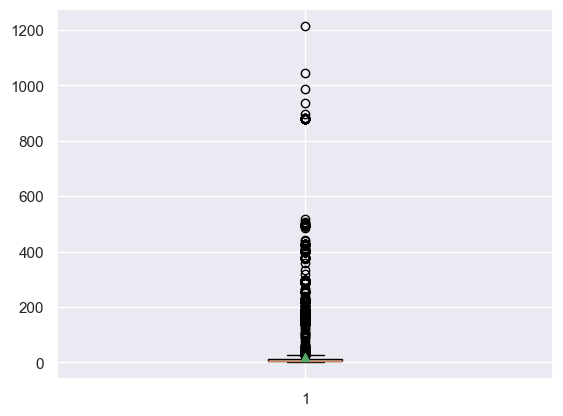

In [75]:

test = df.groupby(['raceId', 'driverId', 'year'])['milliseconds'].apply(list)
test = test.reset_index()
test['num_laps'] = test['milliseconds'].apply(len)
# Because n = 30 is a big deal and stuff
test = test[test['num_laps'] >= 30]
test['std_dev'] = list(map(lambda x: np.asarray(x).std()/1000, test['milliseconds']))
# test = test.groupby(['raceId'])['std_dev'].apply(list)
# test['median_std'] = list(map(lambda x: np.median(np.asarray(x)), test['std_dev']))
# test = pd.merge(test, results, on = ['raceId'], how = 'inner')

plt.boxplot(x= test['std_dev'].values, showmeans = True);

<AxesSubplot: title={'center': 'std_dev'}, xlabel='Finishing Position', ylabel='Standard deviation of lap times (seconds)'>

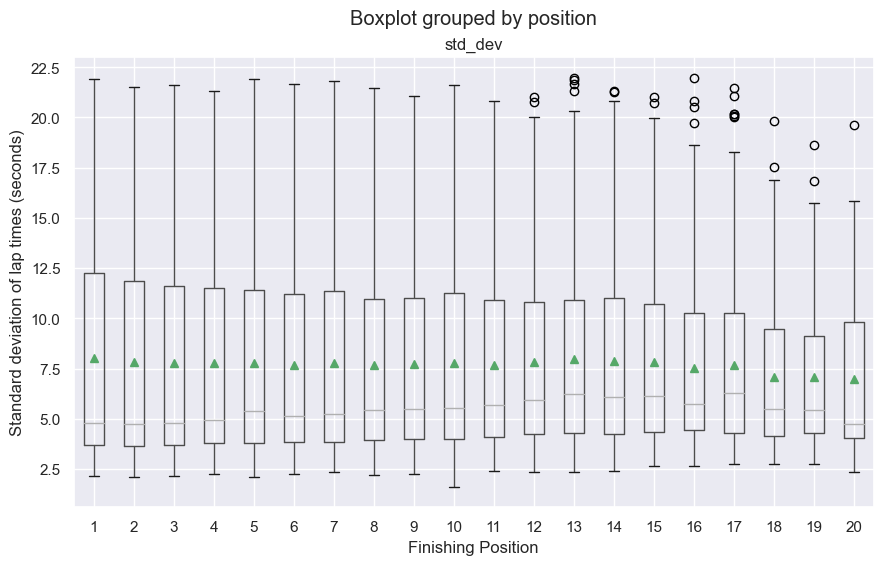

In [76]:
test = test[test['std_dev'] < 22]
std_and_pos = pd.merge(test, results, on = ['raceId', 'driverId'])
std_and_pos = std_and_pos[std_and_pos['position'] != '\\N']
std_and_pos['position'] = std_and_pos['position'].astype(int)
std_and_pos = std_and_pos[std_and_pos['position'] <= 20]
std_and_pos.boxplot(column = ['std_dev'], by = ['position'], figsize = (10, 6), showmeans = True,
    xlabel = 'Finishing Position', ylabel = 'Standard deviation of lap times (seconds)')

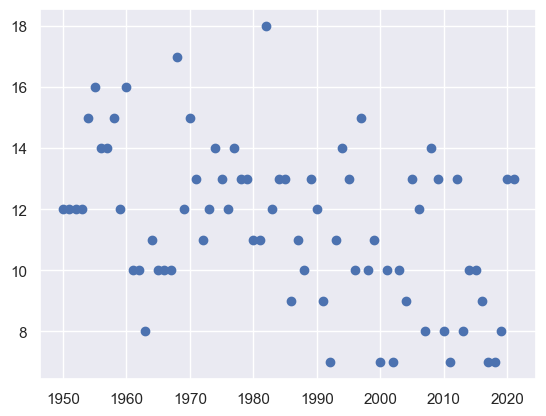

In [119]:
unique_podiums = pd.merge(races, results, on = ['raceId'])
unique_podiums = unique_podiums.groupby(['year', 'position'])['driverId'].apply(list)
unique_podiums = unique_podiums.reset_index()
unique_podiums = unique_podiums[unique_podiums['position'] != '\\N']
unique_podiums = unique_podiums[unique_podiums['year'] != 2022]
unique_podiums['position'] = unique_podiums['position'].astype(int)
unique_podiums = unique_podiums[unique_podiums['position'] <= 3]
unique_podiums = unique_podiums.groupby(['year'])['driverId'].apply(list)
unique_podiums = unique_podiums.reset_index()
unique_podiums['driverId'] = list(map(lambda x: x[0]+x[1]+x[2], unique_podiums['driverId']))
unique_podiums['diff_podiums'] = list(map(lambda x: len(np.unique(x)), unique_podiums['driverId']))
plt.scatter(x = unique_podiums['year'], y = unique_podiums['diff_podiums'])

<AxesSubplot: title={'center': 'std_dev'}, xlabel='[raceId]'>

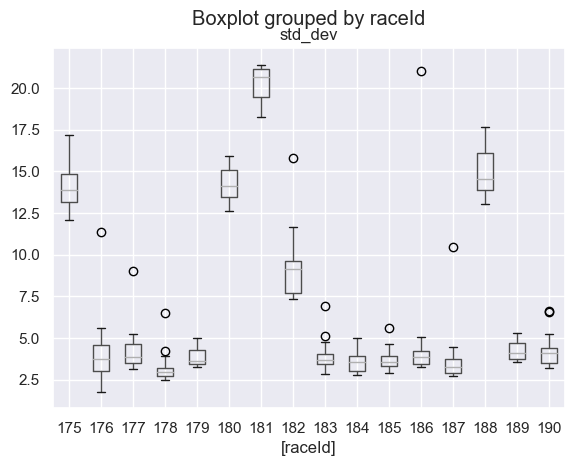

In [3]:
# for y in test['year'].unique():
#     season = test[test['year'] == y]
#     for r in season['raceId'].unique().sort(reverse = True):
# for y in test.year.unique():
sample = test[test['year'] == 1999]
sample = sample[sample['std_dev'] < 25]
sample.boxplot(column = ['std_dev'], by = ['raceId'])
# asdf = asdf.groupby(['raceId'])['std_dev'].apply(list).to_frame()
# asdf = asdf.sort_index(ascending = False)
# season_length = len(asdf)

# for d in asdf['std_dev']:
#     plt.scatter(x = np.arange(1, len(d) + 1), y = d, s = 12)




In [4]:
def get_means(year, id_start, id_end):
	races = df[df['year'] == year]

	race_and_driver = races.groupby(['raceId', 'driverId'])['milliseconds'].apply(list)
	race_id = []
	means = []

	for i in range(id_start, id_end + 1):
		for row in race_and_driver[i]:
			race_id.append(i)
			means.append(np.mean(row))

	merge = pd.DataFrame(list(zip(race_id, means)), columns = ['race_id', 'mean_lap_time'])
	grouped = merge.groupby(['race_id'])['mean_lap_time'].apply(list)

	final = []
	for x in grouped:
		final.append(np.std(x) / 1000)

	return final

In [5]:
s2000 = df[df['year'] == 2000]
s2001 = df[df['year'] == 2001]
s2002 = df[df['year'] == 2002]
s2003 = df[df['year'] == 2003]
s2004 = df[df['year'] == 2004]
s2005 = df[df['year'] == 2005]

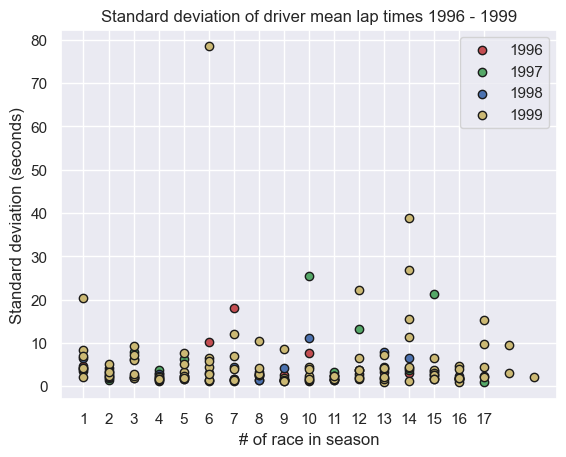

In [7]:
std_1996 = get_means(1996, 224, 239)
std_1997 = get_means(1997, 207, 223)
std_1998 = get_means(1998, 191, 206)
std_1999 = get_means(1999, 175, 190)
std_2000 = get_means(2000, 158, 174)
std_2001 = get_means(2001, 141, 157)
std_2002 = get_means(2002, 124, 140)
std_2003 = get_means(2003, 108, 123)
std_2004 = get_means(2004, 90, 107)
std_2005 = get_means(2005, 71, 89)


# plt.style.use('ggplot')
plt.figure(dpi = 100)
plt.scatter(np.arange(1, len(std_1996)+1), std_1996, color = 'r', edgecolor = 'k', label = '1996')
plt.scatter(np.arange(1, len(std_1997)+1), std_1997, color = 'g', edgecolor = 'k', label = '1997')
plt.scatter(np.arange(1, len(std_1998)+1), std_1998, color = 'b', edgecolor = 'k', label = '1998')
plt.scatter(np.arange(1, len(std_1999)+1), std_1999, color = 'y', edgecolor = 'k', label = '1999')
plt.scatter(np.arange(1, len(std_2000)+1), std_2000, color = 'y', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_2001)+1), std_2001, color = 'y', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_2002)+1), std_2002, color = 'y', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_2003)+1), std_2003, color = 'y', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_2004)+1), std_2004, color = 'y', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_2005)+1), std_2005, color = 'y', edgecolor = 'k')

plt.legend()
plt.xticks(np.arange(1, 18, 1))
plt.ylabel('Standard deviation (seconds)');
plt.xlabel('# of race in season');
# plt.ylim(bottom = 0, top = 20)
plt.title('Standard deviation of driver mean lap times 1996 - 1999');